https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://datatofish.com/logistic-regression-python/

https://www.geeksforgeeks.org/ml-logistic-regression-using-python/

In [15]:
#Importing models
import pandas as pd
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict
%matplotlib inline


#Uploading data
file = 'normal.xlsx'
file1 = 'torsion.xlsx'
normal = pd.read_excel(file)
torsion= pd.read_excel(file1)

Getting the data into one dataframe. 

In [16]:
m = []
m.append('all_features')

feature_cols = ["Ra", "Vol_age", "Vol", "Medialized","Periph_follicles", "Mass", "Flow", "Free_Fluid",'label']
x_free_normal = normal[feature_cols]
x_free_torsed = torsion[feature_cols]

# Removing NAN:
x_free_normal = x_free_normal.dropna()
x_free_torsed = x_free_torsed.dropna()

#Concatinating variables

df = pd.concat([x_free_normal, x_free_torsed], ignore_index=True)

LOGISTIC REGRESSION. 

In [17]:
col = ["Ra", "Vol_age", "Vol", "Medialized","Periph_follicles", "Mass", "Flow", "Free_Fluid"]
y = df["label"]
x = df[col]
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.059678
         Iterations 12
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.879     
Dependent Variable: label            AIC:              64.9358   
Date:               2020-04-20 14:18 BIC:              97.0650   
No. Observations:   410              Log-Likelihood:   -24.468   
Df Model:           7                LL-Null:          -202.36   
Df Residuals:       402              LLR p-value:      7.1059e-73
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     12.0000                                      
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Ra                -0.0659   0.0328 -2.0052 0.0449 -0.1302 -0.0015
Vol_age            1.9258   1.0130  1.9010 0.0573 -0.0597  3.9113

In [18]:
model = LogisticRegression(C=1e9)
mdl = model.fit(x, y)
coeff = mdl.coef_[0]

/Users/lesiyonr/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Standardized Coefficiencts

In [19]:
md = model.fit(x/(np.std(x)), y)
std_coeff = md.coef_
std_coeff

/Users/lesiyonr/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ -1.30603662,  24.37655947, -12.01245422,   0.51557977,
          1.5793718 ,   1.37024074,  -1.19217645,  -0.91205598]])

Unstandardized coefficients

In [20]:

l = []
for i in range(len(coeff)):
    l.append(abs(coeff[i]*x[col[i]].max()))
arr = np.array(l)
s = sum(arr)
d = arr/s

/Users/lesiyonr/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


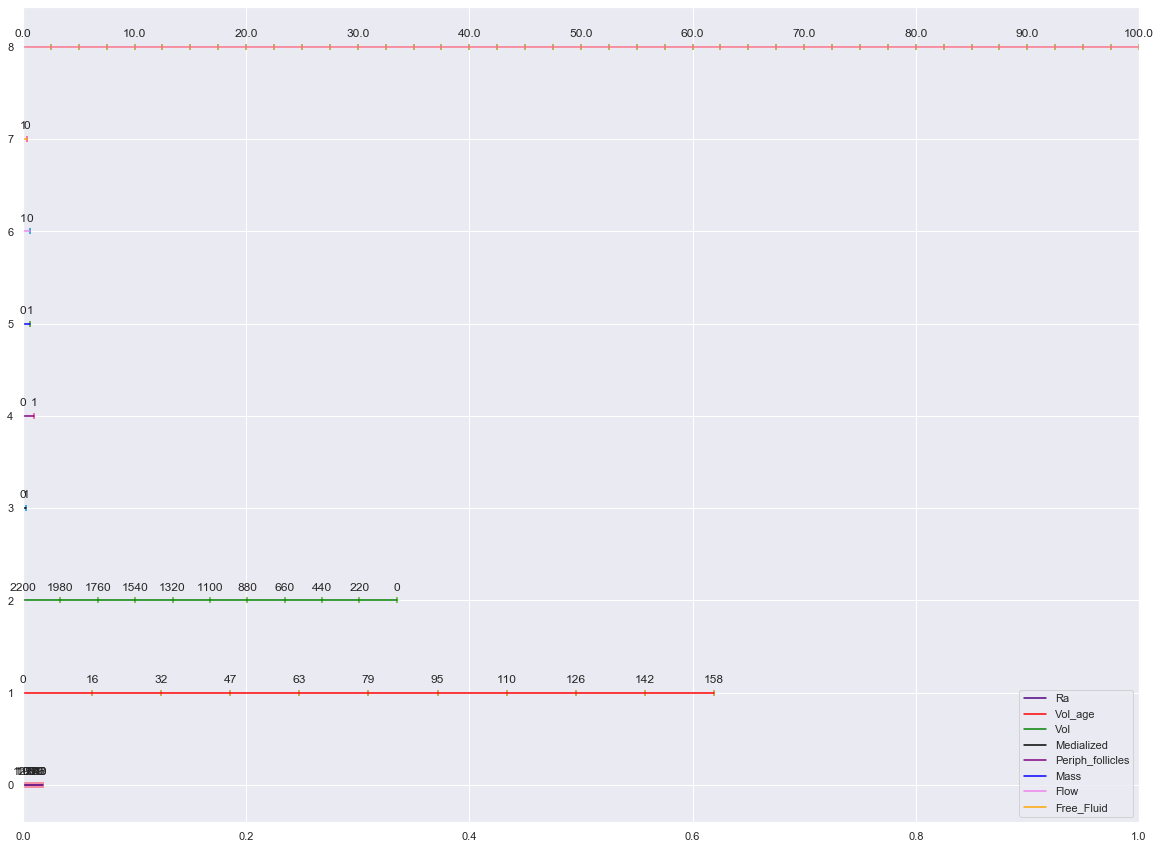

In [21]:
#Logistic regression
col = ["Ra", "Vol_age", "Vol", "Medialized","Periph_follicles", "Mass", "Flow", "Free_Fluid"]
y = df["label"]
x = df[col]
model = LogisticRegression(C=1e9)
mdl = model.fit(x, y)
coeff = mdl.coef_[0]

# Finding the approximate weight of each coefficient based on the others. 
l = []
for i in range(len(coeff)):
    l.append(abs(coeff[i]*x[col[i]].max()))
arr = np.array(l)
s = sum(arr)
d = arr/s

#Making a plot of a nomogram based on the weight found and the coefficients of regression


def plot(d, coeff, col):
    sns.set()
    plt.figure(figsize = (20, 15))

    sns.set_palette("husl")
    c = ["indigo", "red", "green", "black","purple", "blue", "violet", "orange"]

    for i in range(len(d)):
        plt.xlim(0, 1)
        plt.axhline(y=i, xmin=0, xmax=d[i], label =col[i], color = c[i])
        l = (np.array(df[col[i]])).max()
        if l != 1:
            x = np.linspace(0, d[i], 11)
            y= np.ones(11)*i
            if coeff[i] < 0:
                xs = np.linspace(l, 0, 11)
            else:
                xs = np.linspace(0, l, 11)
            plt.scatter(x, y, marker = "|")
            j = 0
            for x, y in zip(x, y):
                label = "{:.0f}".format(xs[j])
                plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
                j = j + 1
        else:
            x = np.linspace(0, d[i], 2)
            y= np.ones(2)*i
            plt.scatter(x, y, marker = '|')
            if coeff[i] < 0:
                xs = np.linspace(l, 0, 2)
            else:
                xs = np.linspace(0, l, 2)
            plt.scatter(x, y, marker = "|")
            j = 0
            for x, y in zip(x, y):
                label = "{:.0f}".format(xs[j])
                plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
                j = j + 1        
                
                
    x = np.linspace(0, 1, 41)
    plt.axhline(y= (len(d)), xmin=0, xmax=1)
    y = np.ones(41)*(len(d))
    plt.scatter(x, y, marker = "|")
    
    x = np.linspace(0, 1, 11)
    y = np.ones(11)*(len(d))
    xs = np.linspace(0, 100, 11)
    j = 0
    for x, y in zip(x, y):
                label = "{:.1f}".format(xs[j])
                plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
                j = j + 1
    plt.legend()
    

plot(d, coeff, col)

Standardized Coefficients

In [22]:
s_d = abs(std_coeff[0])/sum(abs(std_coeff[0]))
s_d

array([0.03018728, 0.5634313 , 0.27765168, 0.01191693, 0.03650505,
       0.03167127, 0.02755555, 0.02108094])

(0, 100)

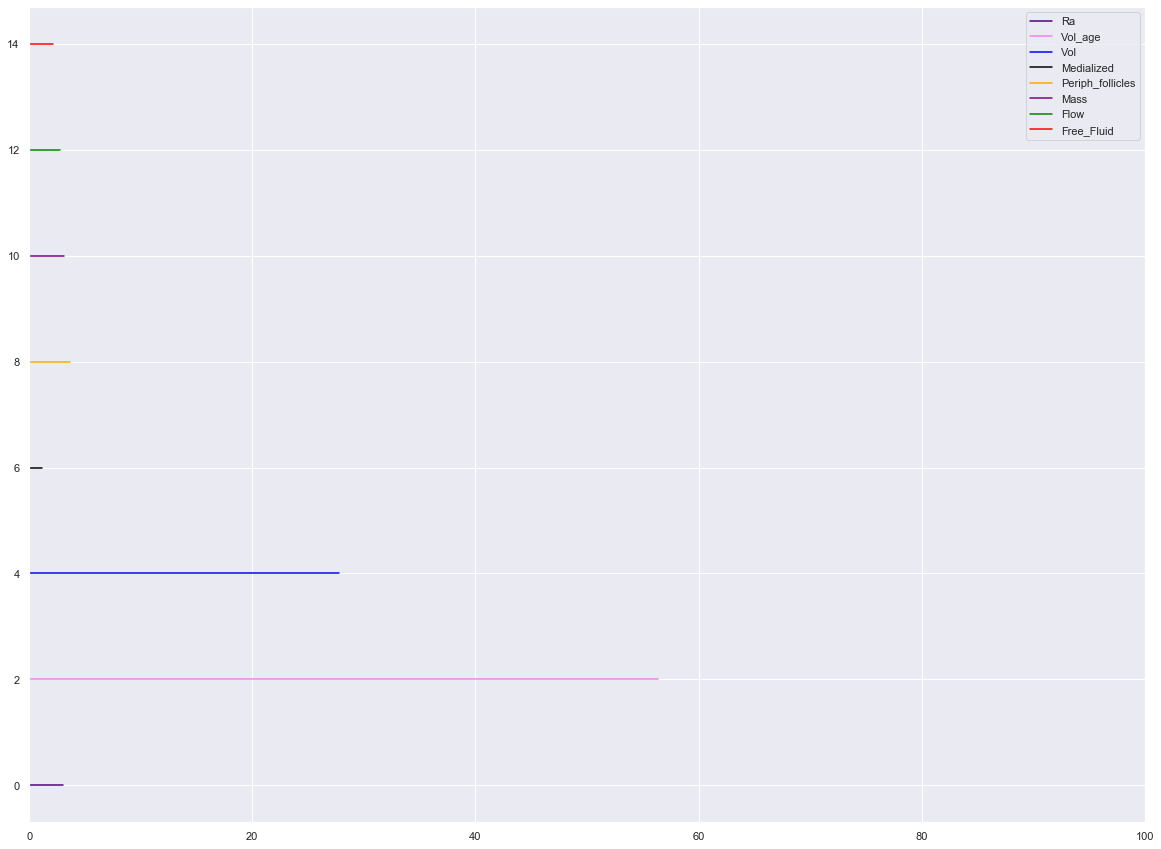

In [23]:
import seaborn as sns
plt.figure(figsize = (20, 15))

plt.axhline(y=0, xmin=0, xmax=0.03018, label = "Ra", color = "indigo")
plt.axhline(y=2, xmin=0, xmax=0.5634, label = "Vol_age", color = "violet")
plt.axhline(y=4, xmin=0, xmax=0.2776, label ="Vol", color = "blue")
plt.axhline(y=6, xmin=0, xmax=0.01192, label = "Medialized", color = "black")
plt.axhline(y=8, xmin=0, xmax=0.03651, label = "Periph_follicles", color = "orange")
plt.axhline(y=10, xmin=0, xmax=0.03167, label = "Mass", color = "purple")
plt.axhline(y=12, xmin=0, xmax=0.02756, label = "Flow", color = "green")
plt.axhline(y=14, xmin=0, xmax=0.02108, label = 'Free_Fluid', color = "red")
plt.legend()

plt.xlim(0, 100)

Free Fluid and Flow

Expected lenghts; 

    dfree_fluid = 0.1033
    dflow = 0.8967
Nomogram estimated lenghts; 
   
    dfree_fluid = 0.0909
    dflow = 0.909

/Users/lesiyonr/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.10328847, 0.89671153])

<Figure size 1440x1080 with 0 Axes>

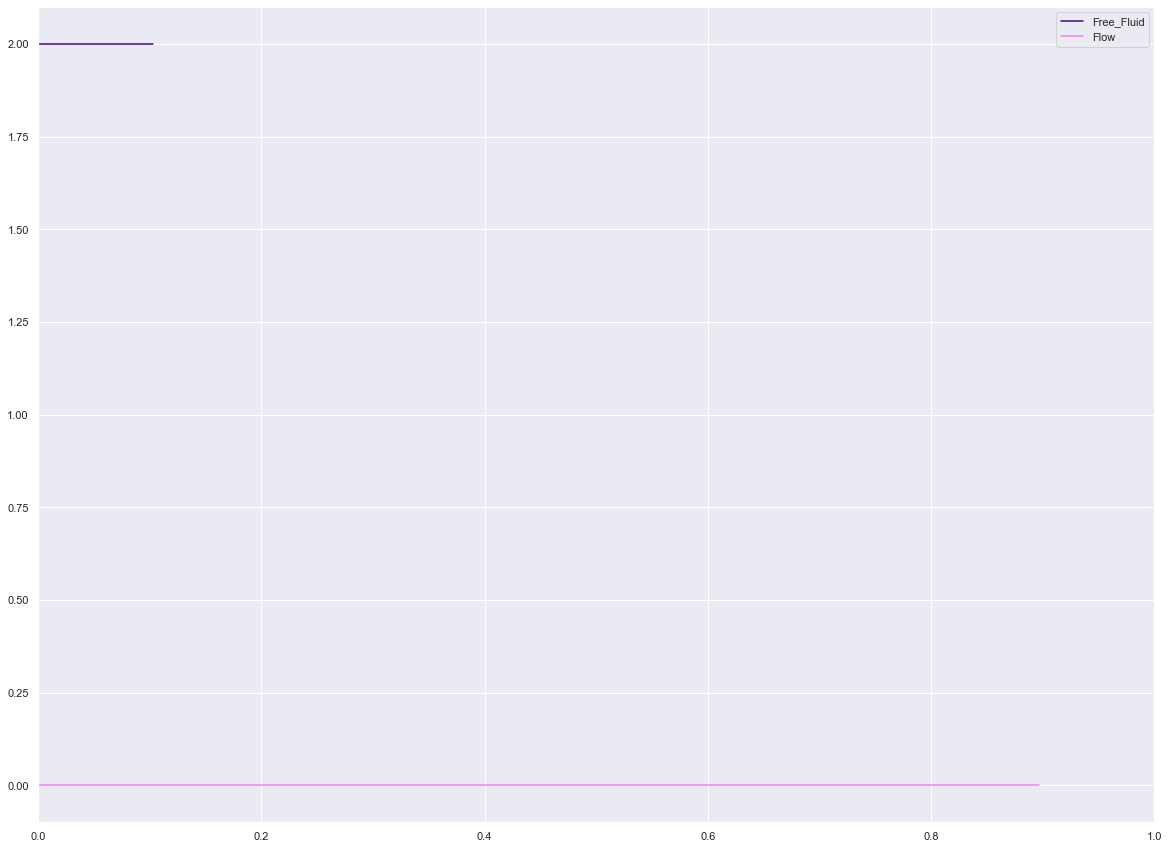

In [24]:
%matplotlib inline

col = ['Free_Fluid', 'Flow']
y = df["label"]
x = df[col]

model = LogisticRegression(C=1e9)
mdl = model.fit(x, y)
coeff = mdl.coef_[0]
coeff

import numpy as np
l = []
for i in range(len(coeff)):
    l.append(abs(coeff[i]*x[col[i]].max()))
arr = np.array(l)
s = sum(arr)
d = arr/s


import seaborn as sns
plt.figure(figsize = (20, 15))


import seaborn as sns
plt.figure(figsize = (20, 15))

plt.axhline(y=2, xmin=0, xmax=0.1033, label = "Free_Fluid", color = "indigo")
plt.axhline(y=0, xmin=0, xmax=0.8967, label = "Flow", color = "violet")

plt.legend()
d

Free_Fluid and Mass; 

Expected lenghts; 

    dfree = 0.1515
    dmass = 0.8484
Nomogram estimated lenghts; 
   
    dfree = 0.1666
    dmass = 0.8333

/Users/lesiyonr/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.15154414, 0.84845586])

<Figure size 1440x1080 with 0 Axes>

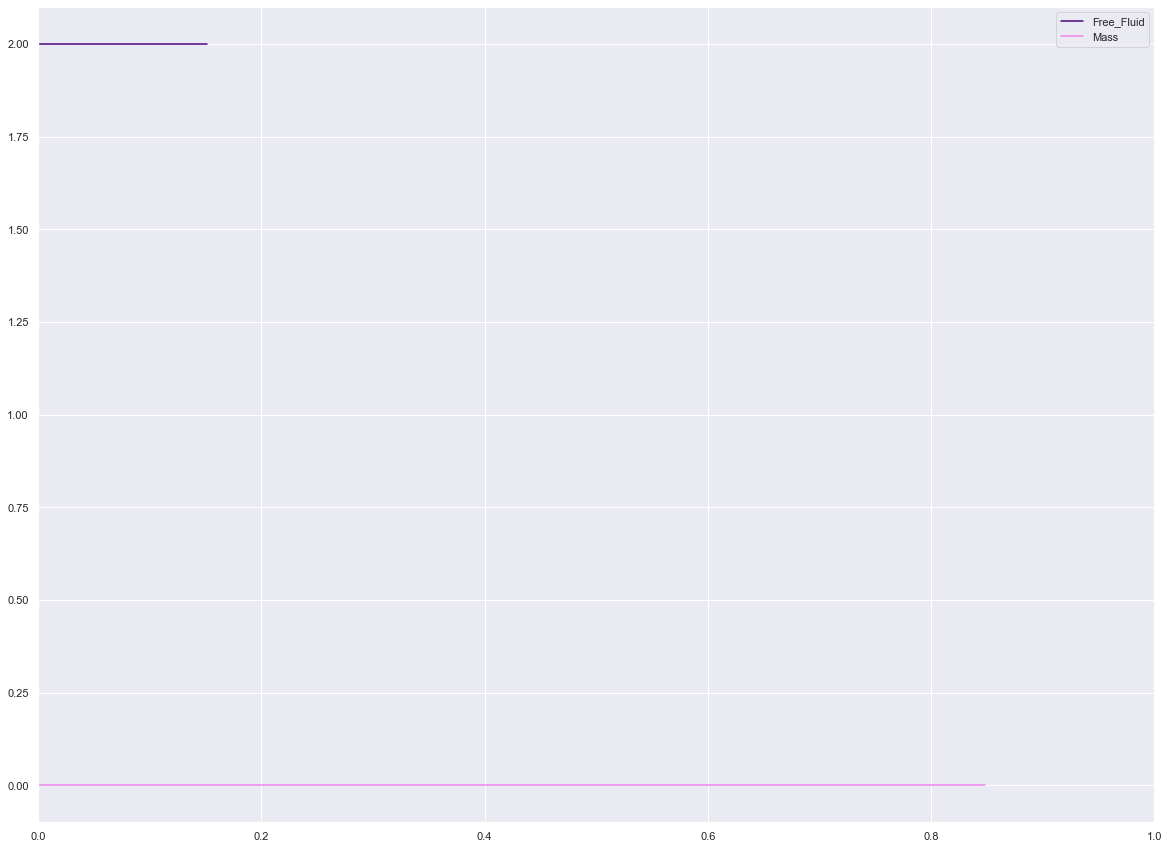

In [25]:
col = ['Free_Fluid', 'Mass']
y = df["label"]
x = df[col]

model = LogisticRegression(C=1e9)
mdl = model.fit(x, y)
coeff = mdl.coef_[0]
coeff

import numpy as np
l = []
for i in range(len(coeff)):
    l.append(abs(coeff[i]*x[col[i]].max()))
arr = np.array(l)
s = sum(arr)
d = arr/s


import seaborn as sns
plt.figure(figsize = (20, 15))


import seaborn as sns
plt.figure(figsize = (20, 15))

plt.axhline(y=2, xmin=0, xmax=0.1515, label = "Free_Fluid", color = "indigo")
plt.axhline(y=0, xmin=0, xmax=0.8484, label = "Mass", color = "violet")

plt.legend()
coeff
d

Flow and Periph_follicles


Expected lenghts; 

    dflow = 0.4418
    dperiph = 0.5581
Nomogram estimated lenghts; 
    
    dflow = 0.44444
    dperiph = 0.5556

/Users/lesiyonr/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<Figure size 1440x1080 with 0 Axes>

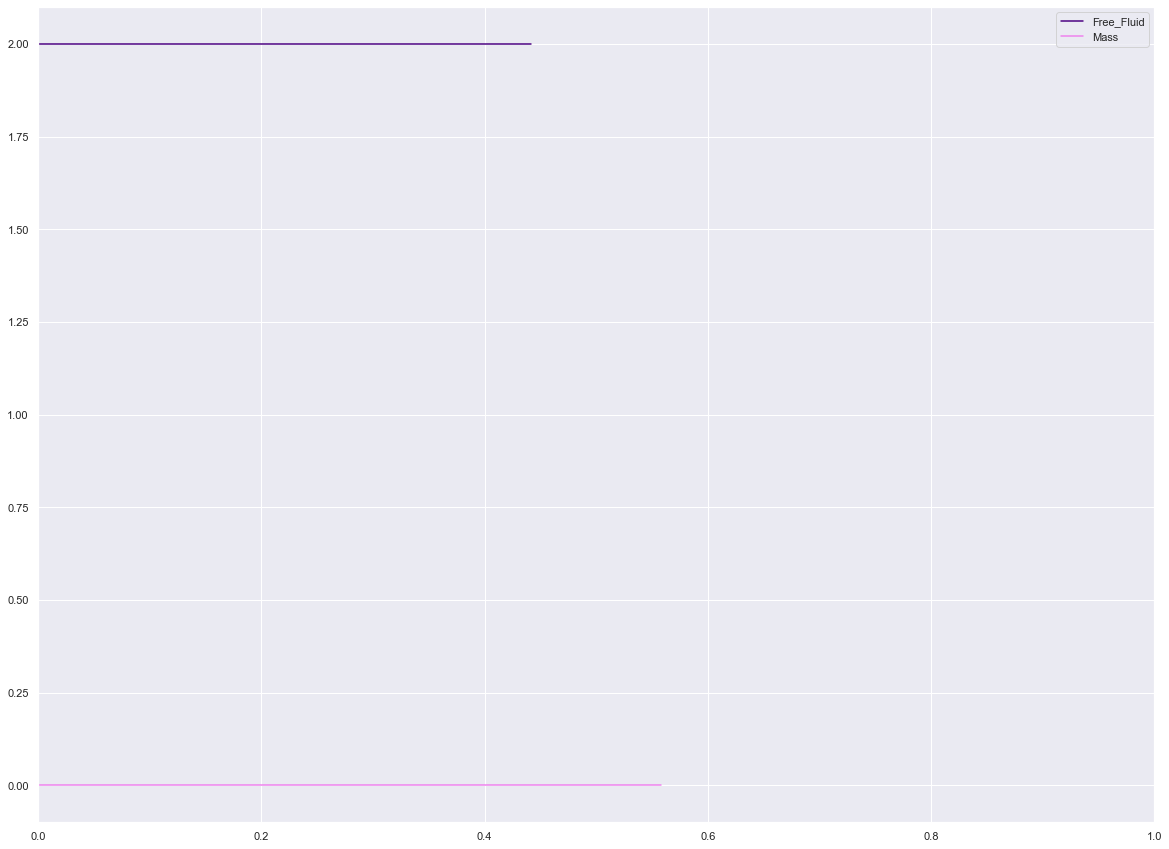

In [26]:
col = ['Periph_follicles', 'Flow']
y = df["label"]
x = df[col]

model = LogisticRegression(C=1e9)
mdl = model.fit(x, y)
coeff = mdl.coef_[0]
coeff

import numpy as np
l = []
for i in range(len(coeff)):
    l.append(abs(coeff[i]*x[col[i]].max()))
arr = np.array(l)
s = sum(arr)
d = arr/s


import seaborn as sns
plt.figure(figsize = (20, 15))


import seaborn as sns
plt.figure(figsize = (20, 15))

plt.axhline(y=2, xmin=0, xmax=0.4418, label = "Free_Fluid", color = "indigo")
plt.axhline(y=0, xmin=0, xmax=0.5581, label = "Mass", color = "violet")

plt.legend()